<a href="https://colab.research.google.com/github/unique-subedi/stats604-project1/blob/main/604_project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<a href="https://colab.research.google.com/github.com/unique-subedi/stats604-project1/blob/main/604_project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open notebook on Colab"/></a>

In [17]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 200)
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import urllib.request

## Make a dictionary of dataframes for each plate

In [20]:
plates = {}
j = 1
for i in range(510, 536):
  if(i != 518 and i != 527):
    url = "https://raw.githubusercontent.com/unique-subedi/stats604-project1/main/Data/LI8X00"+ str(i) +"_Level2.tsv"
    urllib.request.urlretrieve(url, "LI8X00"+ str(i) +"_Level2.tsv")
    plates["plate"+str(j)] = pd.read_csv("LI8X00"+ str(i) +"_Level2.tsv", sep = '\t')
    j += 1


In [25]:
print(plates.keys())


dict_keys(['plate1', 'plate2', 'plate3', 'plate4', 'plate5', 'plate6', 'plate7', 'plate8', 'plate9', 'plate10', 'plate11', 'plate12', 'plate13', 'plate14', 'plate15', 'plate16', 'plate17', 'plate18', 'plate19', 'plate20', 'plate21', 'plate22', 'plate23', 'plate24'])


In [26]:
plates["plate1"].head()

,WellIndex,ArrayRow,ArrayColumn,Barcode,Well,Spot,PinDiameter,CellLineSet,CellLine,CellLineLx,CellLineAn,CellLineConc,CellLineConcUnit,CellLineTimeReact,CellLineTimeUnit,ECMSet,ECM1,ECM1Lx,ECM1An,ECM1Conc,ECM1ConcUnit,ECM2,ECM2Lx,ECM2An,ECM2Conc,ECM2ConcUnit,ECMTimeReact,ECMUnit,LigandSet,Ligand1,Ligand1Lx,Ligand1An,Ligand1Conc,Ligand1ConcUnit,Ligand1TimeReact,Ligand1TimeUnit,DrugSet,Drug1,Drug1Lx,Drug1An,Drug1Conc,Drug1ConcUnit,Drug1TimeReact,Drug1TimeUnit,StainingSet,395nm,395nmLx,488nm,488nmLx,555nm,555nmLx,640nm,640nmLx,750nm,750nmLx,EndpointDAPI,Endpoint488,Endpoint555,Endpoint647,Endpoint750,ECM3,ECMp,Ligand,MEP,Drug,MEP_Drug,PrintSpot,Spot_PA_Perimeter,Cells_CP_AreaShape_Area,Cells_CP_AreaShape_Compactness,Cells_CP_AreaShape_Eccentricity,Cells_CP_AreaShape_Extent,Cells_CP_AreaShape_FormFactor,Cells_CP_AreaShape_MajorAxisLength,Cells_CP_AreaShape_MaxFeretDiameter,Cells_CP_AreaShape_MaximumRadius,Cells_CP_AreaShape_MeanRadius,Cells_CP_AreaShape_MedianRadius,Cells_CP_AreaShape_MinFeretDiameter,Cells_CP_AreaShape_MinorAxisLength,Cells_CP_AreaShape_Orientation,Cells_CP_AreaShape_Perimeter,Cells_CP_AreaShape_Solidity,Cytoplasm_CP_AreaShape_Area,Cytoplasm_CP_AreaShape_Compactness,Cytoplasm_CP_AreaShape_Eccentricity,Cytoplasm_CP_AreaShape_Extent,Cytoplasm_CP_AreaShape_FormFactor,Cytoplasm_CP_AreaShape_MajorAxisLength,Cytoplasm_CP_AreaShape_MaxFeretDiameter,Cytoplasm_CP_AreaShape_MaximumRadius,Cytoplasm_CP_AreaShape_MeanRadius,Cytoplasm_CP_AreaShape_MedianRadius,Cytoplasm_CP_AreaShape_MinFeretDiameter,Cytoplasm_CP_AreaShape_MinorAxisLength,Cytoplasm_CP_AreaShape_Orientation,Cytoplasm_CP_AreaShape_Perimeter,Cytoplasm_CP_AreaShape_Solidity,Nuclei_CP_AreaShape_Area,Nuclei_CP_AreaShape_Compactness,Nuclei_CP_AreaShape_Eccentricity,Nuclei_CP_AreaShape_Extent,Nuclei_CP_AreaShape_FormFactor,Nuclei_CP_AreaShape_MajorAxisLength,Nuclei_CP_AreaShape_MaxFeretDiameter,Nuclei_CP_AreaShape_MaximumRadius,Nuclei_CP_AreaShape_MeanRadius,Nuclei_CP_AreaShape_MedianRadius,Nuclei_CP_AreaShape_MinFeretDiameter,Nuclei_CP_AreaShape_MinorAxisLength,Nuclei_CP_AreaShape_Orientation,Nuclei_CP_AreaShape_Perimeter,Nuclei_CP_AreaShape_Solidity,Cells_CP_Intensity_IntegratedIntensity_CellMask,Cells_CP_Intensity_IntegratedIntensity_KRT19,Cells_CP_Intensity_IntegratedIntensity_KRT5,Cells_CP_Intensity_MedianIntensity_CellMask,Cells_CP_Intensity_MedianIntensity_KRT19,Cells_CP_Intensity_MedianIntensity_KRT5,Cytoplasm_CP_Intensity_IntegratedIntensity_CellMask,Cytoplasm_CP_Intensity_IntegratedIntensity_Dapi,Cytoplasm_CP_Intensity_IntegratedIntensity_KRT19,Cytoplasm_CP_Intensity_IntegratedIntensity_KRT5,Cytoplasm_CP_Intensity_MedianIntensity_CellMask,Cytoplasm_CP_Intensity_MedianIntensity_Dapi,Cytoplasm_CP_Intensity_MedianIntensity_KRT19,Cytoplasm_CP_Intensity_MedianIntensity_KRT5,Nuclei_CP_Intensity_IntegratedIntensity_Dapi,Nuclei_CP_Intensity_IntegratedIntensity_KRT19,Nuclei_CP_Intensity_IntegratedIntensity_KRT5,Nuclei_CP_Intensity_MedianIntensity_Dapi,Nuclei_CP_Intensity_MedianIntensity_KRT19,Nuclei_CP_Intensity_MedianIntensity_KRT5,Nuclei_PA_AreaShape_Neighbors,Nuclei_PA_Cycle_State,Cytoplasm_PA_Gated_KRT5Positive,Cytoplasm_PA_Gated_KRT19Positive,Cytoplasm_PA_Intensity_LineageRatio,Cytoplasm_PA_Gated_KRTClass,Spot_PA_SpotCellCount,Nuclei_PA_Cycle_DNA2NProportion,Nuclei_PA_Cycle_DNA4NProportion,Cytoplasm_PA_Gated_BasalLuminalNegativeProportion,Cytoplasm_PA_Gated_BasalNegativeLuminalPositiveProportion,Cytoplasm_PA_Gated_BasalPositiveLuminalNegativeProportion,Cytoplasm_PA_Gated_BasalPositivedLuminalPositiveProportion,Cells_CP_Intensity_IntegratedIntensity_KRT19_SE,Cells_CP_Intensity_IntegratedIntensity_KRT5_SE,Cells_CP_Intensity_MedianIntensity_KRT19_SE,Cells_CP_Intensity_MedianIntensity_KRT5_SE,Cytoplasm_CP_Intensity_IntegratedIntensity_KRT19_SE,Cytoplasm_CP_Intensity_IntegratedIntensity_KRT5_SE,Cytoplasm_CP_Intensity_MedianIntensity_KRT19_SE,Cytoplasm_CP_Intensity_MedianIntensity_KRT5_SE,Nuclei_CP_Intensity_IntegratedIntensity_KRT19_SE,Nuclei_CP_Intensity_IntegratedIn

## Concatenate all the plates for a particular stain. 

In [27]:
stain1 = pd.concat([plates["plate1"],plates["plate2"], plates["plate3"],plates["plate4"],plates["plate5"],plates["plate6"],plates["plate7"],plates["plate8"]])
stain2 = pd.concat([plates["plate9"],plates["plate10"], plates["plate11"],plates["plate12"],plates["plate13"],plates["plate14"],plates["plate15"],plates["plate16"]])
stain3 = pd.concat([plates["plate17"],plates["plate18"], plates["plate19"],plates["plate20"],plates["plate21"],plates["plate22"],plates["plate23"],plates["plate24"]])

## Summary statistic of the cell count for the first plate

In [28]:
df = plates["plate1"].loc[:, "PrintSpot":]
cell_count = df["Spot_PA_SpotCellCount"]
print(cell_count.describe())

count    5570.000000
mean       64.814901
std        25.831999
min         1.000000
25%        49.000000
50%        67.000000
75%        83.000000
max       149.000000
Name: Spot_PA_SpotCellCount, dtype: float64


## Density plot of the cell count for the first plate

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


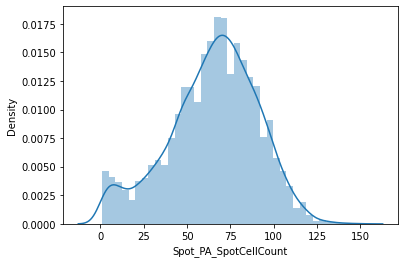

In [ ]:
sns.distplot(cell_count)

## Mean of cell count for every combination of ECMP and Ligand for stain set 1

In [ ]:
stain1.groupby(['ECMp', 'Ligand1']).mean()["Spot_PA_SpotCellCount"]

ECMp     Ligand1               
ALCAM|1  ANGPT1|1_Q15389|1         60.466667
         ANGPT2|1_O15123|1         47.600000
         AREG_P15514               70.533333
         BMP2_P12643               54.600000
         BMP3_P12645               78.800000
                                     ...    
gelatin  TNF_P01375                13.000000
         VEGFA|VEGF206_P15692|1     4.000000
         WNT10A_Q9GZT5              5.000000
         WNT3A|1_P56704|1          12.000000
         Wnt5a|1_P22725|1           1.000000
Name: Spot_PA_SpotCellCount, Length: 2847, dtype: float64